In [2]:
import numpy as np
import scipy.stats as stats
import math
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Earplug Dispenser 
### Moldex plugstation<br>

<div>
<img src="https://user-images.githubusercontent.com/66656063/145733120-34efdfad-ea49-4552-892d-9d278a832726.jpg" width="200" height="300" align='left'>
</div>
<!-- <div>
<img src="attachment:MOLDEX%20PLUGSTATION.jpeg" width="200" height="300" align='left'>
</div> -->

***

## Model of Earplugs
### Sparkplugs<br>

Part #6644 (slc 80, 29 db, Class 5 [describes decibal rating])<br>
Noise reduction rating = 33 decibels<br>
250 pair (or 500) per dispenser 
***

## Earplugs Company
### Moldex-Metric, inc.
10111 Jefferson blvd.<br>
Culver City, CA<br>
90232<br>
Phone: 800.421.0668<br>
Email: sales@moldex.com

##### Earplug dispense data

After I noticed I was receiving more than 2 earplugs frequently,<br>
I started keeping track of my daily earplug count

##### Let's see  the amount of plugs  in an array

In [3]:
plugs = np.array([3, 4, 2, 2, 2, 2, 2, 2, 2, 4, 
    3, 2, 2, 2, 2, 2, 2, 2, 4, 2, 4, 4, 2, 3, 2, 2, 2, 4, 3,
    2, 6, 2])

# checking that there was no loss in transfer from other notebook
plugs2 = np.array([3, 4, 2, 2, 2, 2, 2, 2, 2, 4, 
    3, 2, 2, 2, 2, 2, 2, 2, 4, 2, 4, 4, 2, 3, 2, 2, 2, 4, 3,
    2, 6, 2])

In [4]:
len(plugs)

32

In [3]:
# double checking that the array was unchanged, because std was different 
# in the first draft

from collections import defaultdict

def are_equal(arr1, arr2, n, m):
    if (n != m):
        return False
    
    count = defaultdict(int)
    
    for i in arr1:
        count[i] += 1
        
    for i in arr2:
        
        
        if (count[i] ==0):
            return False
        else:
            count[i] -= 1
            
    return True

arr1 = plugs
arr2 = plugs2

n = len(arr1)
m = len(arr2)

if are_equal(arr1, arr2, n, m):
    print("Yes, the two arrays are equal")
    
else:
    print("No, they're different")

Yes, the two arrays are equal


### Now we'll enter the data into a DataFrame

In [6]:
data = {'date' : ['2021-02-21', '2021-02-22', '2021-02-23', '2021-02-24', 
              '2021-02-24', '2021-02-25', '2021-02-26', '2021-02-27', 
               '2021-02-27', '2021-02-28', '2021-03-01', '2021-03-02', 
               '2021-03-03', '2021-03-04', '2021-03-08', 
               '2021-03-09', '2021-03-10', '2021-03-11', '2021-03-12',
              '2021-03-17', '2021-03-18', '2021-03-22', '2021-03-23',
              '2021-03-24', '2021-03-25', '2021-03-26', '2021-03-29',
              '2021-03-30', '2021-03-31', '2021-04-01', '2021-04-02',
               '2021-04-05'],
      
      'number_of_plugs' : [3, 4, 2, 2, 2, 2, 2, 2, 2, 4, 3, 2, 2, 2,
                           2, 2, 2, 2, 4., 2, 4, 4, 2, 3, 2, 2, 2, 4, 
                           3, 2, 6, 2]}


In [8]:
len(df['date']) == len(df['number_of_plugs'])

True

### How's the DataFrame look?

In [7]:
df = pd.DataFrame(data)
df

date  number_of_plugs
0   2021-02-21              3.0
1   2021-02-22              4.0
2   2021-02-23              2.0
3   2021-02-24              2.0
4   2021-02-24              2.0
5   2021-02-25              2.0
6   2021-02-26              2.0
7   2021-02-27              2.0
8   2021-02-27              2.0
9   2021-02-28              4.0
10  2021-03-01              3.0
11  2021-03-02              2.0
12  2021-03-03              2.0
13  2021-03-04              2.0
14  2021-03-08              2.0
15  2021-03-09              2.0
16  2021-03-10              2.0
17  2021-03-11              2.0
18  2021-03-12              4.0
19  2021-03-17              2.0
20  2021-03-18              4.0
21  2021-03-22              4.0
22  2021-03-23              2.0
23  2021-03-24              3.0
24  2021-03-25              2.0
25  2021-03-26              2.0
26  2021-03-29              2.0
27  2021-03-30              4.0
28  2021-03-31              3.0
29  2021-04-01              2.0
30  2021-04-02              6.0
31  2021-04-05              2.0

Making the number entries in the number_of_plugs column integers instead of floats

In [52]:
df['number_of_plugs'] = df['number_of_plugs'].astype(int)


Let's get some standard statistics regarding the amount of<br>
earplugs per attempt.

In [54]:
average = np.mean(plugs)
print(f"The mean number of earplugs dispensed per attempt was {average}")

The mean number of earplugs dispensed per attempt was 2.625


In [81]:
median = np.median(plugs)
print(f"""
In this case, since we are dealing with a skewed dataset with
several outliers, we're going to want the median as well, which is {median}\n
The median also stands for the 50th percentile. Which means half of the data is\
below it and half is above it.

""")


In this case, since we are dealing with a skewed dataset with
several outliers, we're going to want the median as well, which is 2.0

The median also stands for the 50th percentile. Which means half of the data isbelow it and half is above it.




In [56]:
std = np.std(plugs)
print(f"The standard deviation of dispensed earplugs was {std:.3f}")

The standard deviation of dispensed earplugs was 0.992


In [73]:
var = df['number_of_plugs'].var()
print(f"The variance of the number_of_plugs is {var:.2f}")

The variance of the number_of_plugs is 1.02


#### Quartiles and Quantiles

In [66]:
quartz = [df['number_of_plugs'].quantile(0),
         df['number_of_plugs'].quantile(0.25),
         df['number_of_plugs'].quantile(0.50),
         df['number_of_plugs'].quantile(0.75),
         df['number_of_plugs'].quantile(1),]
quartz

[2.0, 2.0, 2.0, 3.0, 6.0]

### Cool, Let's see the data with some clarity

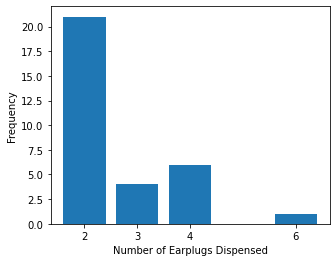

In [57]:
fig, ax = plt.subplots(figsize=(5,4))

ax_bars = [2, 3, 4, 6]

ax = df['number_of_plugs'].hist(grid=False, bins=[x for i in ax_bars for x in (i-0.4,i+0.4)])
ax.set_xticks(ax_bars)
ax.set_xlabel('Number of Earplugs Dispensed')
ax.set_ylabel('Frequency');

Well the good news is, the majority of times 2<br>
earplugs were dispensed

## The Distribution

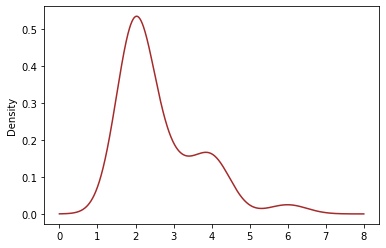

In [58]:
plug_distribution = df['number_of_plugs']
plug_distribution.plot.kde(color='brown');

Check skewness

In [80]:
skew = df['number_of_plugs'].skew()   
print(f"""
Our data's skew is {skew}\n
Data which has no skew, a true normal distribution, has a value of zero
Heavily skewed data has a skew of around 1.0\n
So we are decidedly not normaly distributed.
""")


Our data's skew is 1.6502369354110085

Data which has no skew, a true normal distribution, has a value of zero
Heavily skewed data has a skew of around 1

So we are decidedly not normaly distributed.



Check kurtosis

In [75]:
df['number_of_plugs'].kurt()

2.544186410196262

The non-normal distribution is evident from the box plot as well

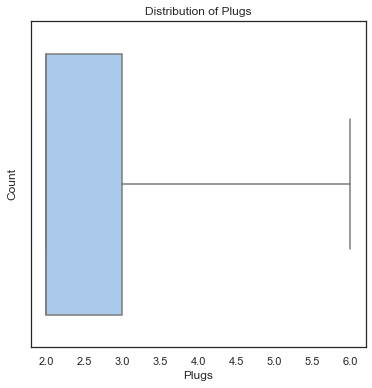

In [100]:
sns.set(style = 'white')
fig, ax = plt.subplots(figsize = (6,6))
sns.boxplot(data = df, x = 'number_of_plugs', palette = 'pastel', fliersize = 5, whis = 8)
ax.set_xlabel('Plugs')
ax.set_ylabel('Count')
ax.set_title('Distribution of Plugs')
plt.show()

Here's a table printed out nicely with alot of<br>
descriptive statistics of our data

In [53]:
df.describe()

number_of_plugs
count        32.000000
mean          2.625000
std           1.008032
min           2.000000
25%           2.000000
50%           2.000000
75%           3.000000
max           6.000000

/var/folders/dp/5k1wgpbj6d72lnbdgvwv16l40000gn/T/ipykernel_6290/1109030129.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  plt.vlines(df.mean(),
/var/folders/dp/5k1wgpbj6d72lnbdgvwv16l40000gn/T/ipykernel_6290/1109030129.py:9: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  plt.vlines(df.median(),


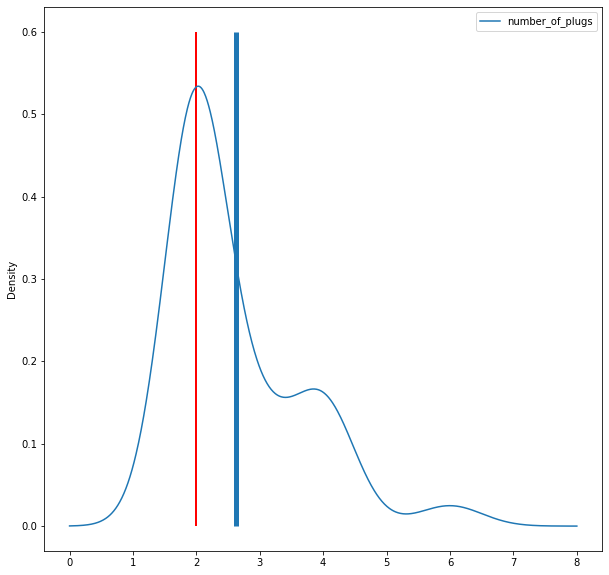

In [59]:
df.plot(kind='density', 
       figsize=(10,10))

plt.vlines(df.mean(),
          ymin=0,
          ymax=0.6,
          linewidth=5.0)

plt.vlines(df.median(),
          ymin=0,
          ymax=0.6,
          linewidth=2.0,
          color='red');

Here we see that the mean bar (blue) has been pulled out further toward the extreme values, while the median (red) stays closer to the bulk of the values. This configuration corresponds to the commonly known concept in Data Science that the mean is more highly-effected by outliers than the median.

In [105]:
df['ln_plugs'] = np.log(df['number_of_plugs'])

An attempt at normal distribution through log-transformation of data

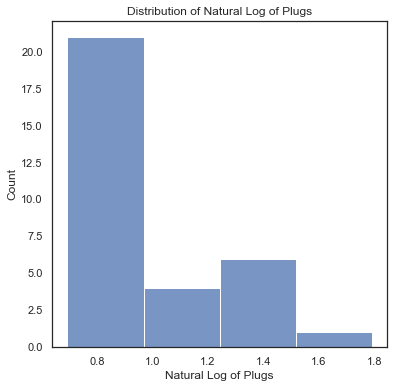

In [109]:
df['ln_plugs'] = np.log(df['number_of_plugs'])

#view distribution of log base e for plugs using histogram
sns.set(style = 'white')
fig, ax = plt.subplots(figsize = (6,6))
sns.histplot(data = df, x = 'ln_plugs', palette = 'Dark', bins=4)
ax.set_xlabel('Natural Log of Plugs')
ax.set_ylabel('Count')
ax.set_title('Distribution of Natural Log of Plugs')
plt.show()

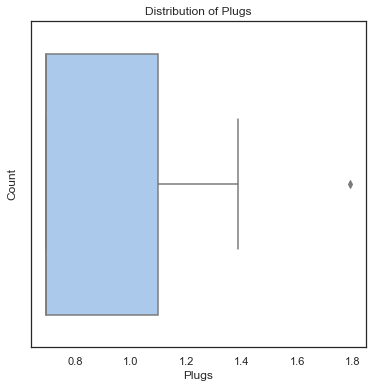

In [110]:
sns.set(style = 'white')
fig, ax = plt.subplots(figsize = (6,6))
sns.boxplot(data = df, x = 'ln_plugs', palette = "pastel")
ax.set_xlabel("Plugs")
ax.set_ylabel("Count")
ax.set_title("Distribution of Plugs")
plt.show()

Looking at the log-n histogram and the log-n boxplots, we see there is still a non-normal distribution of the data

#### Just to be clear we should print out the classes we're working with

In [60]:
classes = df['number_of_plugs'].unique()
print(sorted(classes))

[2, 3, 4, 6]


What's the range of the number_of_plugs column?

In [62]:
lone_ranger = max(df['number_of_plugs']) - min(df['number_of_plugs'])
print(f"The range, which shouldn't be a huge surprise, is {lone_ranger}")

The range, which shouldn't be a huge surprise, is 4


# The purpose of this project

A container holds 500 earplugs. Each employee only needs exactly 2 earplugs per attempt<br>
They are however, receiving 2.6 earplugs per attempt.

In [94]:
true_ammount = 2.6/2
true_ammount

1.3

That's 130% per attempt

In [96]:
print(f"Every time an employee gets earplugs they are receiving 30% more earplugs than intended")

Every time an employee gets earplugs they are receiving 30% more earplugs than intended


30% of that is waste

#### At time of writing, Amazon sells the same Moldex Plugstation  for $37.95 

In [99]:
# unit price multiplied by percent wasted
37.95 * .3  

11.385

## 11.38 per container is wasted

# Times this number by the amount of Plugstations per facility, multiplied by the amount of faciliites that use the Moldex Plugstation and you have X amount of waste per year that is avoidable, waste that could be eliminated by switching to more reliable Moldex dispensors or by finding another company with a better designed dispensor. With this small change, I can see the company saving thousands of dollars over time. 

## 11.39 x Number of Containers x Number of Facilities = amount of savings per year

# A few examples of a common occurrence

<div>
<img src="https://user-images.githubusercontent.com/66656063/145733138-fc5b1f9e-b968-48ce-929c-c3d80d1bf640.jpg" width="500" height="700" align="left"/> 
</div>

<!-- <div>
<img src="attachment:Image%2010-20-21%20at%207.14%20PM-2.jpg" width="500" height="700" align="left"/>
</div> -->
<!-- <div>
<img src="attachment:MOLDEX%20PLUGSTATION.jpeg" width="200" height="300" align='left'/>
</div> -->

<div>
<img src="https://user-images.githubusercontent.com/66656063/145733141-48e04f43-17ad-4ead-a1ec-b58460a67d79.jpg" width="500" height="700" align='center'/>
</div>

<div>
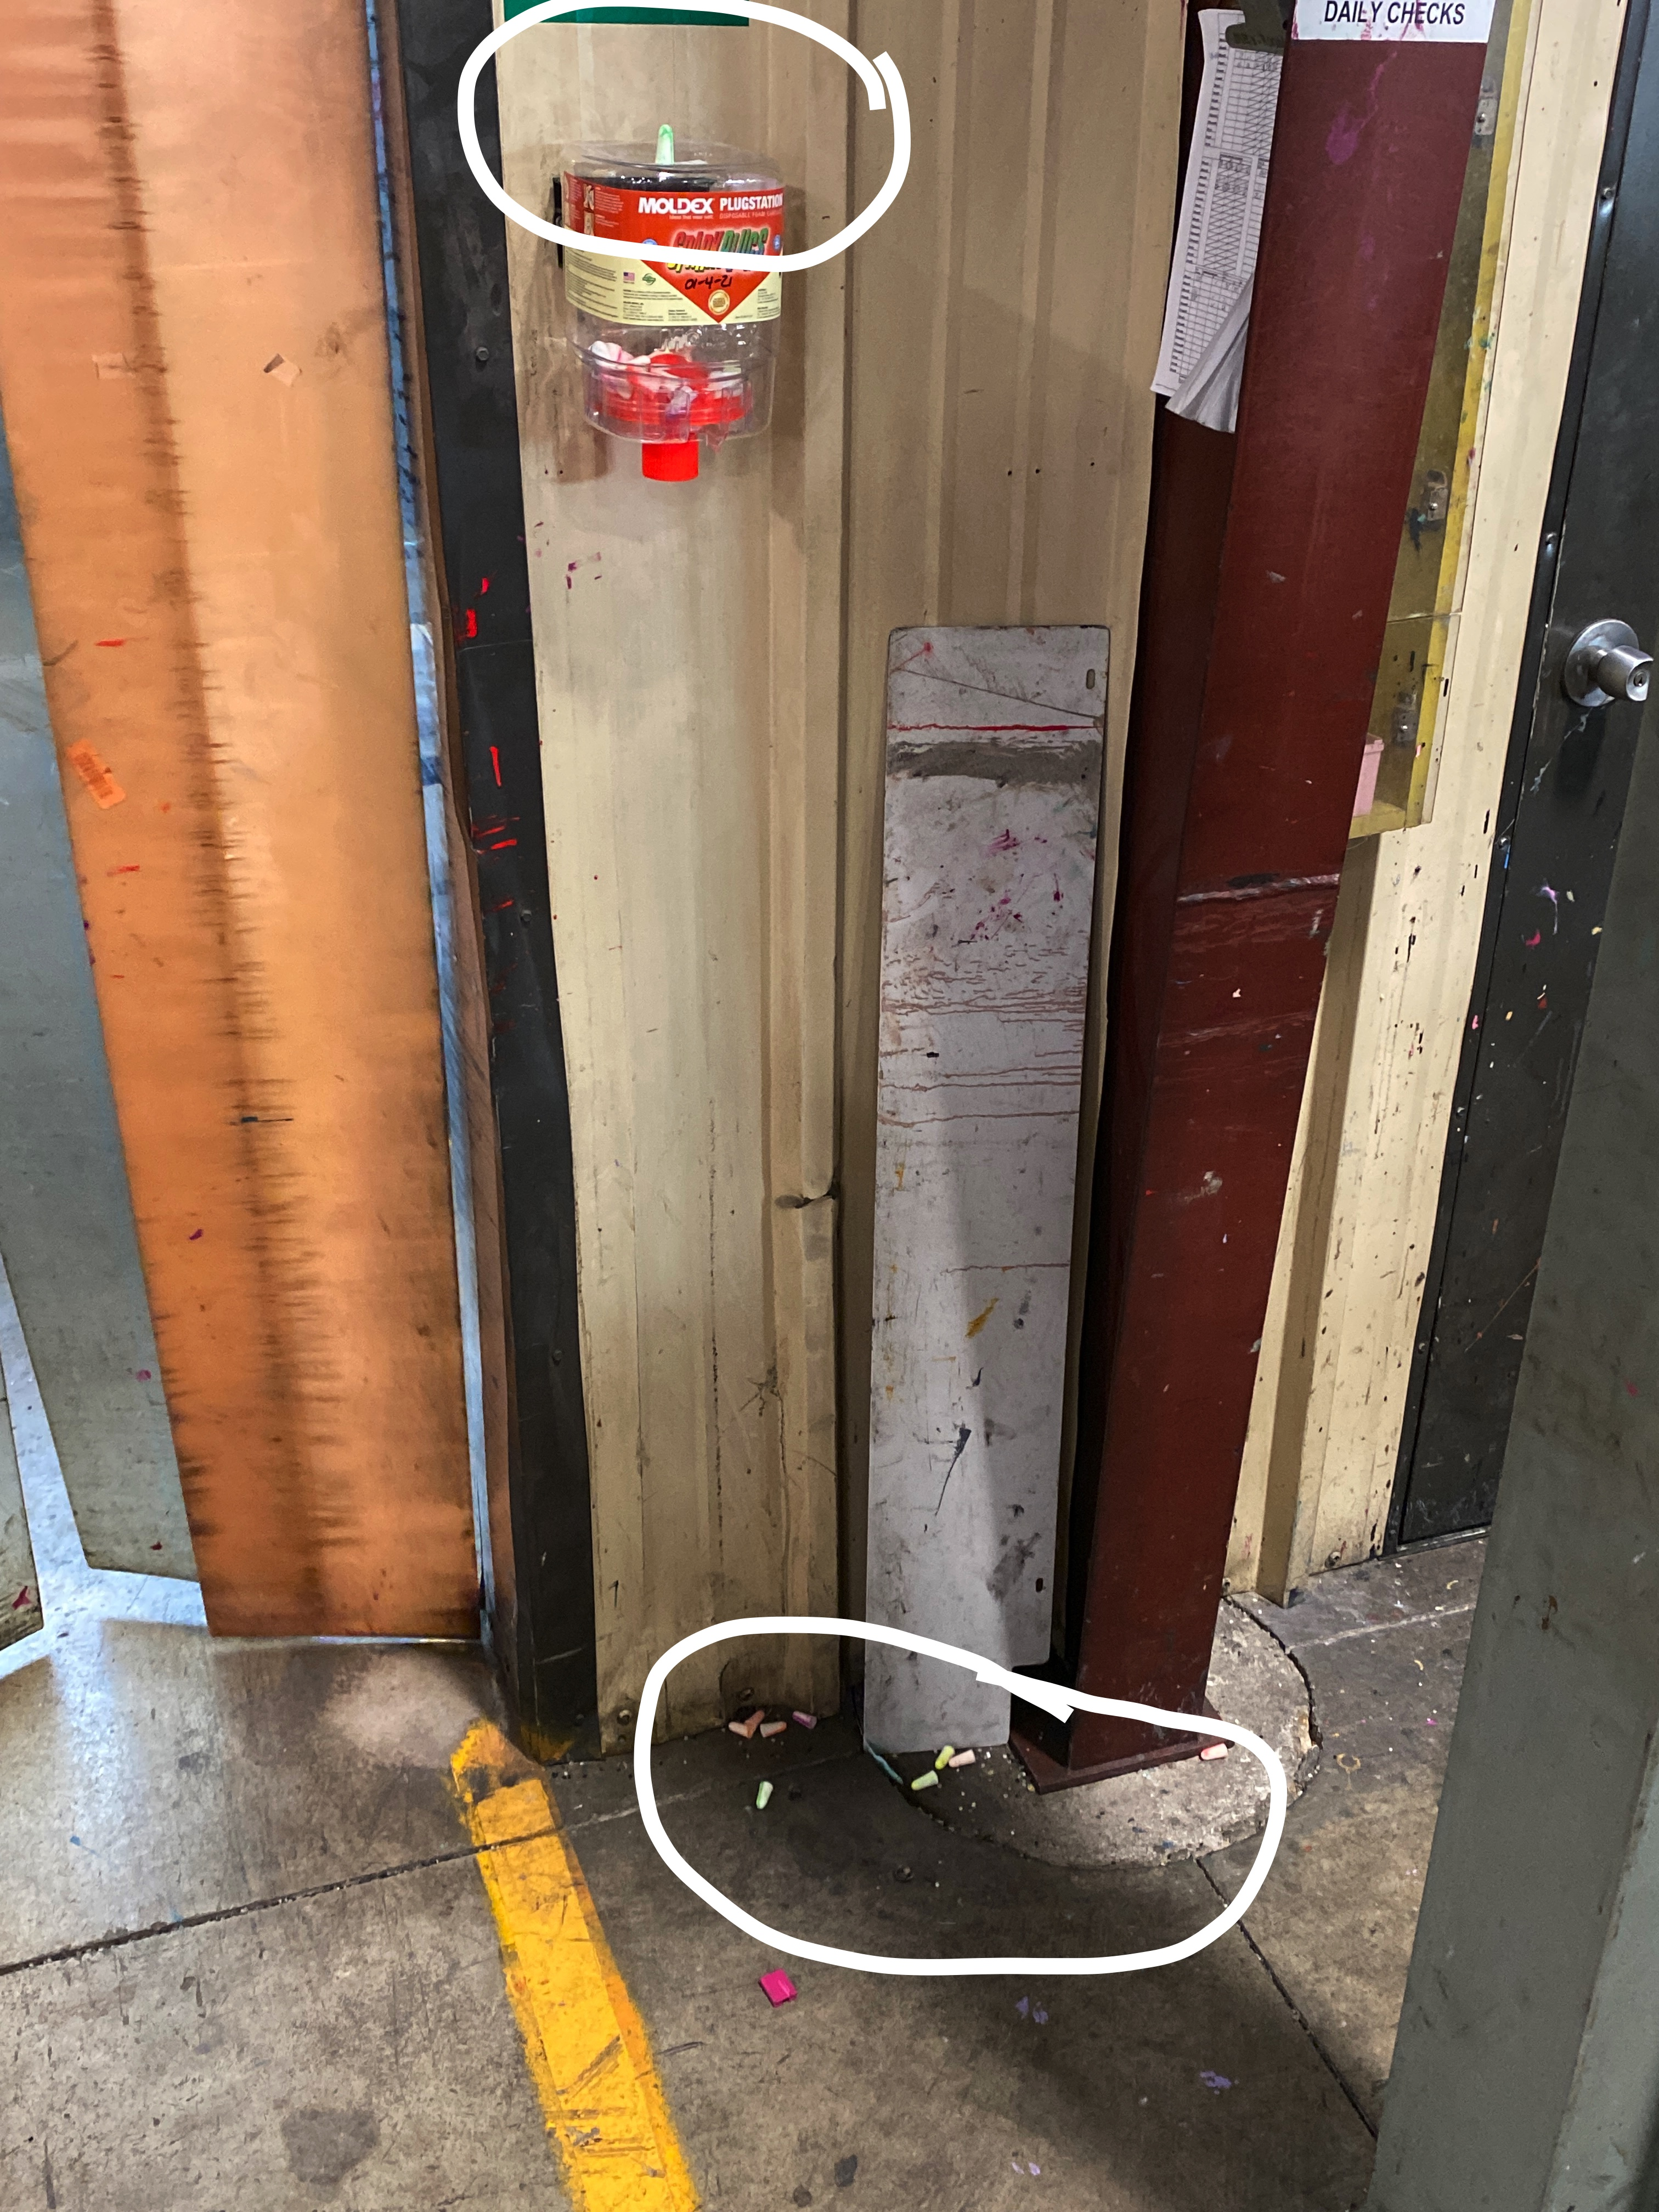
</div>

## It is to be assumed that company's policy is that no<br>employee should be picking plugs up off the ground or any surface<br> and inserting them into the ear canal, for various health and safety reasons.